In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv("~/Downloads/2019Meal.csv", thousands=',')

In [7]:
df['Shortfall Per Person'] = df['2019 Weighted Annual Food Budget Shortfall']/df['# of Food Insecure Persons in 2019']
df = df[["FIPS", "State", "County, State", "2019 Food Insecurity Rate", '2019 Cost Per Meal']]

In [8]:
df1 = pd.read_csv("~/Downloads/PovertyEstimates.csv", thousands=',')
df1 = df1[["FIPS", "PCTPOVALL_2019", "MEDHHINC_2019"]]

In [9]:
df1.head()

,FIPS,PCTPOVALL_2019,MEDHHINC_2019
0,0,12.3,65712
1,1000,15.6,51771
2,1001,12.1,58233
3,1003,10.1,59871
4,1005,27.1,35972


In [10]:
df2 = pd.read_csv("~/Downloads/EducationData.csv", thousands=',')
df2 = df2[["FIPS", "Percent of adults with less than a high school diploma 2015-19", "Percent of adults with a high school diploma only 2015-19", "Percent of adults completing some college or associate's degree 2015-19", "Percent of adults with a bachelor's degree or higher 2015-19"]]

In [11]:
df3 = pd.merge(df, df1, 
                   on='FIPS', 
                   how='inner')

In [12]:
df4 = pd.merge(df3, df2, 
                   on='FIPS', 
                   how= 'inner' )

In [13]:
population = pd.read_csv("~/Downloads/PopulationEstimates.csv", thousands=',')


In [14]:
df5 = pd.merge(df4, population, 
                   on='FIPS', 
                   how= 'inner')

In [15]:
disability = pd.read_csv("~/Downloads/Disability.csv", thousands=',')

In [16]:
disability = disability[["FIPS", "Disabled workers"]]

In [17]:
df6 = pd.merge(df5, disability, 
                   on='FIPS', 
                   how= 'inner')

In [18]:
unemployment = pd.read_csv("~/Downloads/Unemployment.csv", thousands=',')

In [19]:
fulldf1 = pd.merge(df6, unemployment, 
                   on='FIPS', 
                   how= 'inner')

In [20]:
fulldf1['Log PCTPOVALL_2019'] = np.log(fulldf1['PCTPOVALL_2019'])

In [21]:
fulldf1['Log MEDHHINC_2019'] = np.log(fulldf1['MEDHHINC_2019'])

In [22]:
fulldf1['Log Percent of adults with less than a high school diploma 2015-19'] = np.log(fulldf1['Percent of adults with less than a high school diploma 2015-19'])

In [23]:
fulldf1.dropna(axis = 1, inplace = True)

In [24]:
fulldf1['Proportion of Disabled Workers'] = fulldf1['Disabled workers']/fulldf1['Population 2020']

In [47]:
fulldf1 = fulldf1.rename(columns={'Unemployment_rate_2019': 'Unemployment Rate', 'Proportion of Disabled Workers': '% of Disabled Workers', '2019 Cost Per Meal': 'Cost Per Meal', 'PCTPOVALL_2019': '% of All in Poverty', 'Log MEDHHINC_2019': 'Log MEDHHINC', 'Percent of adults with less than a high school diploma 2015-19': '% of adults less than HS Diploma 2015-19'})


In [51]:
fulldf1.to_csv('FinalProjData.csv')

In [26]:
# make matrix plot of all the different predictors

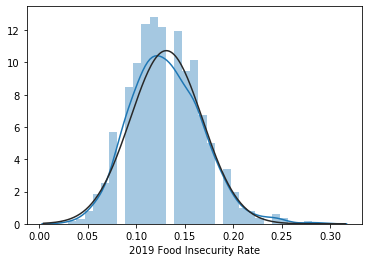

In [27]:
sns.distplot(fulldf1['2019 Food Insecurity Rate'], fit = stats.norm)

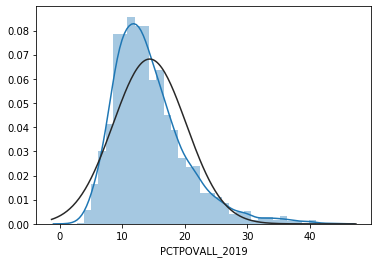

In [28]:
sns.distplot(fulldf1['PCTPOVALL_2019'] , fit = stats.norm)

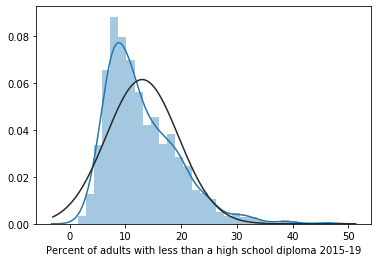

In [29]:
sns.distplot(fulldf1['Percent of adults with less than a high school diploma 2015-19'], fit = stats.norm)
# if transform, use logit transformation

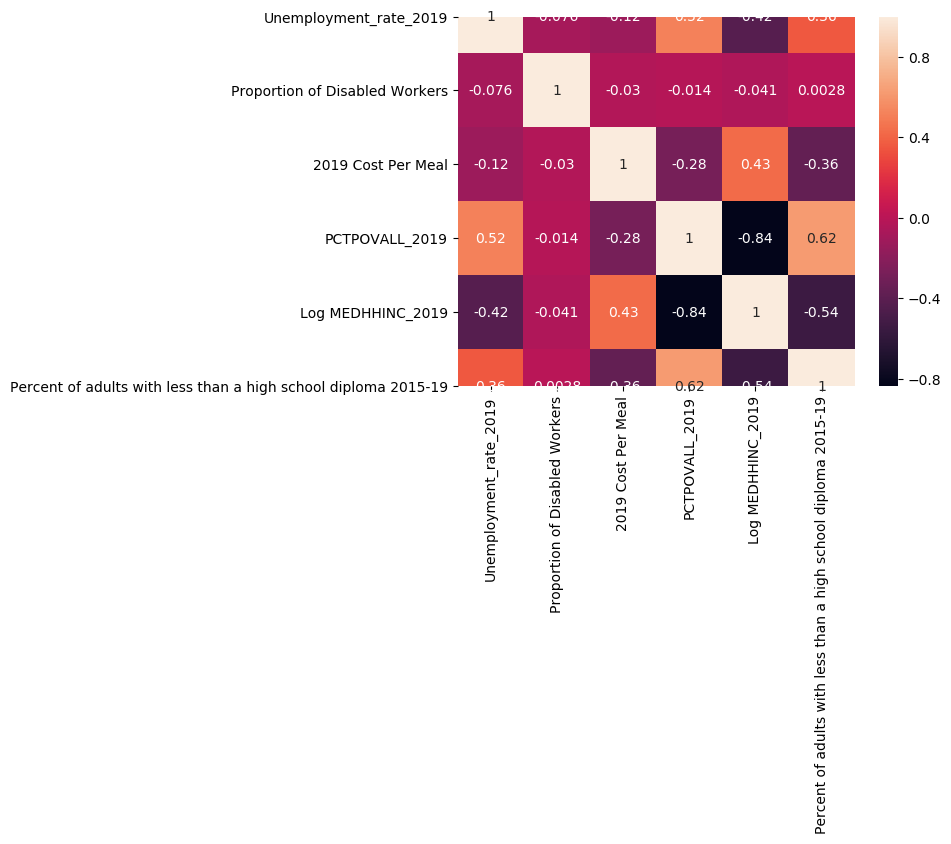

In [756]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = fulldf1[['Unemployment_rate_2019', 'Proportion of Disabled Workers', '2019 Cost Per Meal', 'PCTPOVALL_2019', 'Log MEDHHINC_2019', 'Percent of adults with less than a high school diploma 2015-19']]
corrMatrix = variables.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [604]:
fulldf1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Linear Regression

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


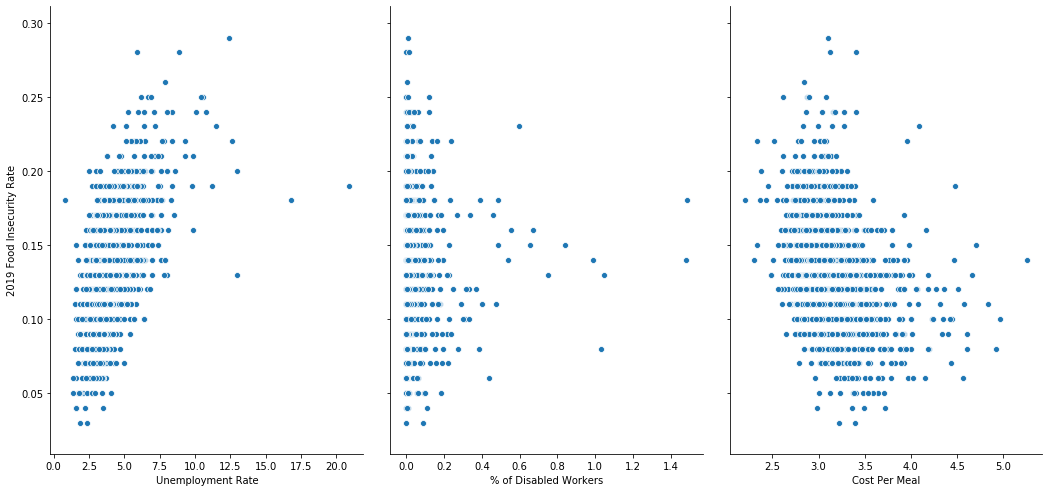

In [48]:
sns.pairplot(fulldf1, x_vars=['Unemployment Rate', '% of Disabled Workers', 'Cost Per Meal'], y_vars='2019 Food Insecurity Rate', size=7, aspect=0.7)

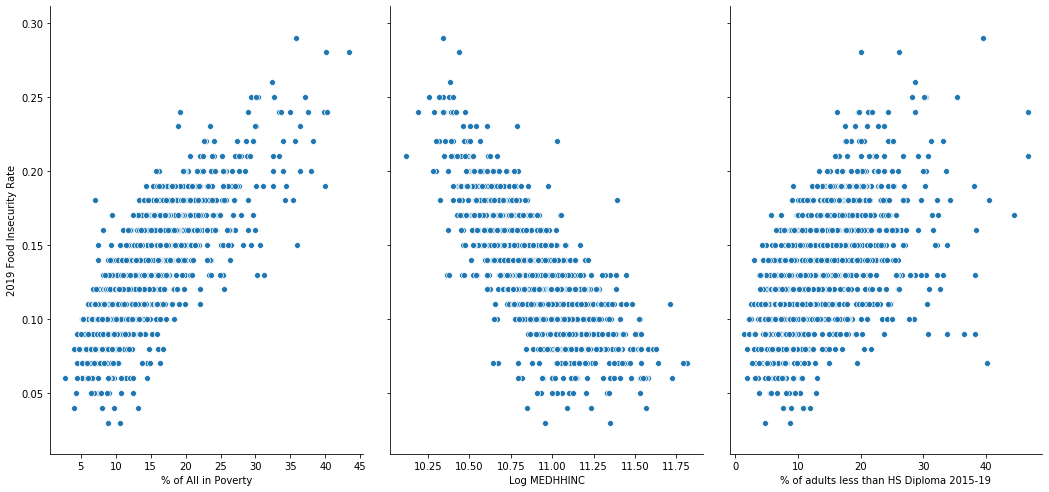

In [49]:
sns.pairplot(fulldf1, x_vars=['% of All in Poverty', 'Log MEDHHINC', '% of adults less than HS Diploma 2015-19'], y_vars='2019 Food Insecurity Rate', size=7, aspect=0.7)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = fulldf1['2019 Food Insecurity Rate'].values.reshape(-1,1)
y = fulldf1['2019 Food Insecurity Rate'].values

features = ['Unemployment Rate', '% of Disabled Workers', 'Cost Per Meal', '% of All in Poverty', 'Log MEDHHINC', '% of adults less than HS Diploma 2015-19', '2019 Food Insecurity Rate']

In [61]:
df_train, df_test = train_test_split(fulldf1, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('2019 Food Insecurity Rate',axis=1), df_train['2019 Food Insecurity Rate']
X_test, y_test = df_test.drop('2019 Food Insecurity Rate',axis=1), df_test['2019 Food Insecurity Rate']

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [63]:
lin_reg.intercept_

0.5766608069134073

In [64]:
lin_reg.coef_

array([ 0.00525781,  0.02184676, -0.00711186,  0.0023281 , -0.04443004,
        0.00051866])

In [65]:
y_pred = lin_reg.predict(X_test)

In [66]:
r2 = lin_reg.score(X_test, y_test)

In [67]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
errors

0.0004262007656798115

In [68]:
errors_root = mean_squared_error(y_test, y_pred, squared=False)
errors_root 

0.02064463043214413

In [69]:
r2_score(y_test, y_pred)

0.7181806458037563

In [70]:
params = np.append(lin_reg.intercept_,lin_reg.coef_)

newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_test-y_pred)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0        0.5767            0.027    21.705            0.0
1        0.0053            0.000    23.772            0.0
2        0.0218            0.003     7.458            0.0
3       -0.0071            0.001    -7.310            0.0
4        0.0023            0.000    22.711            0.0
5       -0.0444            0.002   -18.389            0.0
6        0.0005            0.000     9.013            0.0


In [71]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

NameError: name 'sm' is not defined

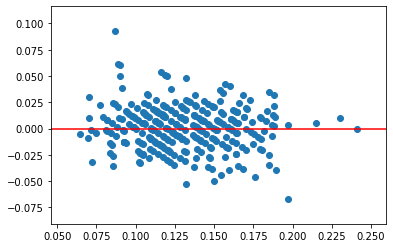

In [53]:
residuals = y_test-y_pred
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [75]:
Xsub = fulldf1['% of All in Poverty'].values.reshape(-1,1)
ysub = fulldf1['2019 Food Insecurity Rate'].values

In [76]:
ols = LinearRegression()
model = ols.fit(Xsub, ysub)
response = model.predict(Xsub)

In [77]:
r2 = model.score(Xsub, ysub)

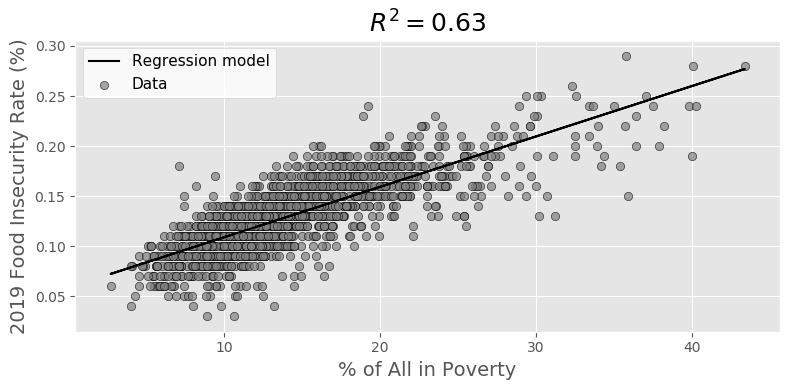

In [79]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(Xsub, response, color='k', label='Regression model')
ax.scatter(Xsub, ysub, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('2019 Food Insecurity Rate (%)', fontsize=14)
ax.set_xlabel('% of All in Poverty', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

# Make a graph

In [81]:
from mpl_toolkits.mplot3d import Axes3D

X = fulldf1[['% of All in Poverty', 'Log MEDHHINC']].values.reshape(-1,2)
Y = fulldf1['2019 Food Insecurity Rate']

In [82]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 50, 30)   # range of porosity values
y_pred = np.linspace(9, 13, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [83]:
ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [84]:
r2 = model.score(X, Y)

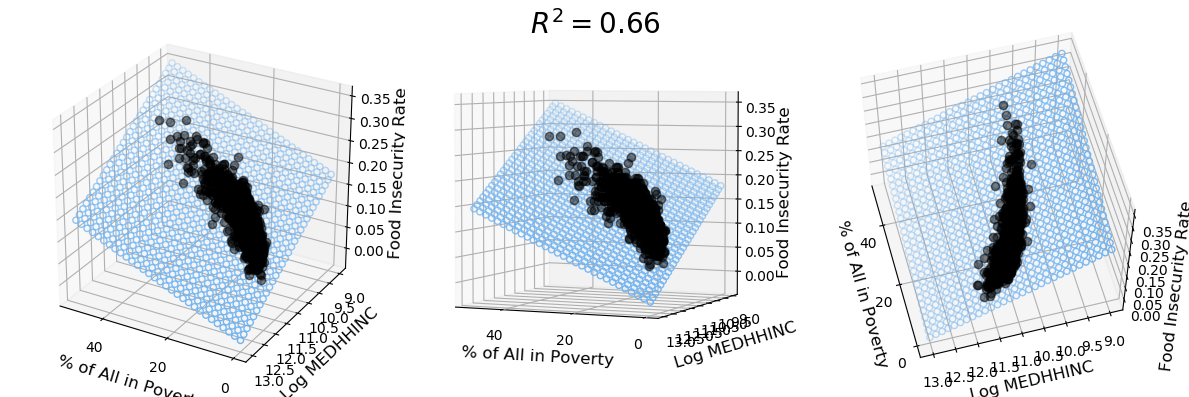

In [85]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('% of All in Poverty', fontsize=12)
    ax.set_ylabel('Log MEDHHINC', fontsize=12)
    ax.set_zlabel('Food Insecurity Rate', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# Ridge Regression

In [795]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train)

In [796]:
y_pr = ridge.predict(X_test)

In [797]:
r2_score(y_test, y_pr)

0.71155773175429

In [798]:
errors = mean_squared_error(y_test, y_pred)
errors

0.002342736904056166

In [799]:
errors_root = mean_squared_error(y_test, y_pred, squared=False)
errors_root

0.048401827486740275

In [46]:
alpha = [0.001, 0.01, 0.1, 1, 10]
scores = []
for a in alpha:
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    y_pr = ridge.predict(X_test)
    scores.append(r2_score(y_test, y_pr))

NameError: name 'Ridge' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(alpha, scores)

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")